<a href="https://www.kaggle.com/code/hasmatali/predicting-employee-absenteeism?scriptVersionId=155868693" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
plt.style.use('fivethirtyeight')

In [2]:
raw_data = pd.read_csv('/kaggle/input/absentismo/Absentismo.csv')
raw_data

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


### Make a copy of the original data frame

In [3]:
df = raw_data.copy()
df

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [4]:
df.shape

(700, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


### Finding the missing value

In [6]:
df.isnull().sum()

ID                           0
Reason for Absence           0
Date                         0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
dtype: int64

## Verifying the dataset has valid values

### changing the date object to datetime

In [7]:
df['Date'].head()

0    07/07/2015
1    14/07/2015
2    15/07/2015
3    16/07/2015
4    23/07/2015
Name: Date, dtype: object

In [8]:
type(df['Date'])

pandas.core.series.Series

In [9]:
type(df['Date'][0])

str

Since date is inserted as a string, lets convert it into timestamp using .to_datetime()

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Date']

0     2015-07-07
1     2015-07-14
2     2015-07-15
3     2015-07-16
4     2015-07-23
         ...    
695   2018-05-23
696   2018-05-23
697   2018-05-24
698   2018-05-24
699   2018-05-31
Name: Date, Length: 700, dtype: datetime64[ns]

In [11]:
df['Date'][1]

Timestamp('2015-07-14 00:00:00')

In [12]:
df['Date'][0].month

7

In [13]:
list_months = []
for i in range(df['Date'].shape[0]):
    list_months.append(df['Date'][i].month)

In [14]:
df['Month Value'] = list_months
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value
0,11,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,36,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,3,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,7,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,11,23,2015-07-23,289,36,33,239.554,30,1,2,1,2,7


Similary, we can extract the day the same way

In [15]:
list_days = []
for i in range(df.shape[0]):
    list_days.append(df['Date'][i].weekday())

In [16]:
df['Day of the Week'] = list_days
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,11,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,36,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,3,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,7,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,11,23,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3


## Dropping the Date column and rearranging the Month value and Day of the Week

In [17]:
df = df.drop(['Date'], axis = 1)

In [18]:
df.columns.values

array(['ID', 'Reason for Absence', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours', 'Month Value', 'Day of the Week'],
      dtype=object)

In [19]:
df_reordered_monthandday = ['ID', 'Month Value', 'Day of the Week', 'Reason for Absence', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours']

In [20]:
df = df[df_reordered_monthandday]
df.head()

,ID,Month Value,Day of the Week,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,7,1,26,289,36,33,239.554,30,1,2,1,4
1,36,7,1,0,118,13,50,239.554,31,1,1,0,0
2,3,7,2,23,179,51,38,239.554,31,1,0,0,2
3,7,7,3,7,279,5,39,239.554,24,1,2,0,4
4,11,7,3,23,289,36,33,239.554,30,1,2,1,2


### checking the outliers

In [21]:
df[df['Month Value'] == 0]

,ID,Month Value,Day of the Week,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours


# Exploratory Data Analysis

It is better to add additional columns because the dataset contains numeric values only.

### mapping Reason for Absence

In [22]:
reason_mapping = {
    0: 'Unknown',
    1: 'Certain infectious and parasitic diseases',
    2: 'Neoplasms',
    3: 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
    4: 'Endocrine, nutritional and metabolic diseases',
    5: 'Mental and behavioural disorders',
    6: 'Diseases of the nervous system',
    7: 'Diseases of the eye and adnexa',
    8: 'Diseases of the ear and mastoid process',
    9: 'Diseases of the circulatory system',
    10: 'Diseases of the respiratory system',
    11: 'Diseases of the digestive system',
    12: 'Diseases of the skin and subcutaneous tissue',
    13: 'Diseases of the musculoskeletal system and connective tissue',
    14: 'Diseases of the genitourinary system',
    15: 'Pregnancy, childbirth and the puerperium',
    16: 'Certain conditions originating in the perinatal period',
    17: 'Congenital malformations, deformations and chromosomal abnormalities',
    18: 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
    19: 'Injury, poisoning and certain other consequences of external causes',
    20: 'External causes of morbidity and mortality',
    21: 'Factors influencing health status and contact with health services',
    22: 'Patient follow-up',
    23: 'Medical consultation',
    24: 'Blood donation',
    25: 'Laboratory examination',
    26: 'Unjustified absence',
    27: 'Physiotherapy',
    28: 'Dental consultation'
}
df['reason_text'] = df['Reason for Absence'].map(reason_mapping)

In [23]:
df.head()

,ID,Month Value,Day of the Week,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,reason_text
0,11,7,1,26,289,36,33,239.554,30,1,2,1,4,Unjustified absence
1,36,7,1,0,118,13,50,239.554,31,1,1,0,0,Unknown
2,3,7,2,23,179,51,38,239.554,31,1,0,0,2,Medical consultation
3,7,7,3,7,279,5,39,239.554,24,1,2,0,4,Diseases of the eye and adnexa
4,11,7,3,23,289,36,33,239.554,30,1,2,1,2,Medical consultation


## Absenteeism by Reason

In [24]:
reason_abs = df.groupby('reason_text')[['Absenteeism Time in Hours']].sum()
reason_abs

,Absenteeism Time in Hours
reason_text,
Blood donation,24
Certain conditions originating in the perinatal period,6
Certain infectious and parasitic diseases,182
"Congenital malformations, deformations and chromosomal abnormalities",8
Dental consultation,329
Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism,8
Diseases of the circulatory system,168
Diseases of the digestive system,292
Diseases of the ear and mastoid process,30


In [25]:
reason_abs['Absenteeism Time in Hours'].max()

757

#### Those employees sufferring from the Disease of the musculoskeletal system and connective tissue has the highest absenteesim hours

## Sum of Absenteeism Hours by Month

### In which month, hours of absenteeism was the highest? to plot this in graph, month name according to month value must must be inserted as a column in the dataframe. 

In [26]:
df['Month Name'] =  df['Month Value'].apply(lambda x: calendar.month_abbr[x])

In [27]:
df.head()

,ID,Month Value,Day of the Week,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,reason_text,Month Name
0,11,7,1,26,289,36,33,239.554,30,1,2,1,4,Unjustified absence,Jul
1,36,7,1,0,118,13,50,239.554,31,1,1,0,0,Unknown,Jul
2,3,7,2,23,179,51,38,239.554,31,1,0,0,2,Medical consultation,Jul
3,7,7,3,7,279,5,39,239.554,24,1,2,0,4,Diseases of the eye and adnexa,Jul
4,11,7,3,23,289,36,33,239.554,30,1,2,1,2,Medical consultation,Jul


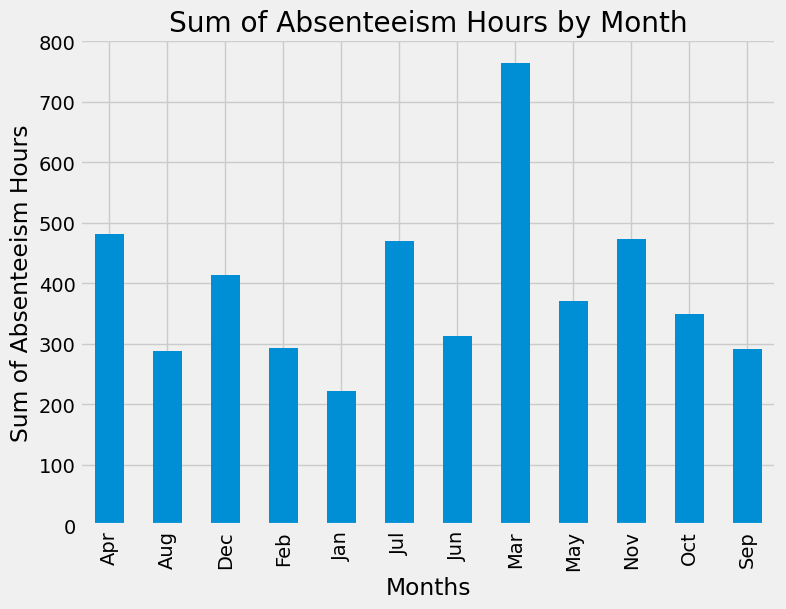

In [28]:
month_abs = df.groupby('Month Name')[['Absenteeism Time in Hours']].sum()
axe = month_abs.plot(kind="bar", figsize=(8,6), legend=False)
axe.set_xlabel('Months')
axe.set_ylabel('Sum of Absenteeism Hours')
axe.set_title('Sum of Absenteeism Hours by Month')
plt.show()

#### From the bar graph above, we can see that the highest number of people were absent in the month of March.

## Sum of Absenteeism hours by Days

In [29]:
df['Day Name'] =  df['Day of the Week'].apply(lambda x: calendar.day_abbr[x])

In [30]:
df.head()

,ID,Month Value,Day of the Week,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,reason_text,Month Name,Day Name
0,11,7,1,26,289,36,33,239.554,30,1,2,1,4,Unjustified absence,Jul,Tue
1,36,7,1,0,118,13,50,239.554,31,1,1,0,0,Unknown,Jul,Tue
2,3,7,2,23,179,51,38,239.554,31,1,0,0,2,Medical consultation,Jul,Wed
3,7,7,3,7,279,5,39,239.554,24,1,2,0,4,Diseases of the eye and adnexa,Jul,Thu
4,11,7,3,23,289,36,33,239.554,30,1,2,1,2,Medical consultation,Jul,Thu


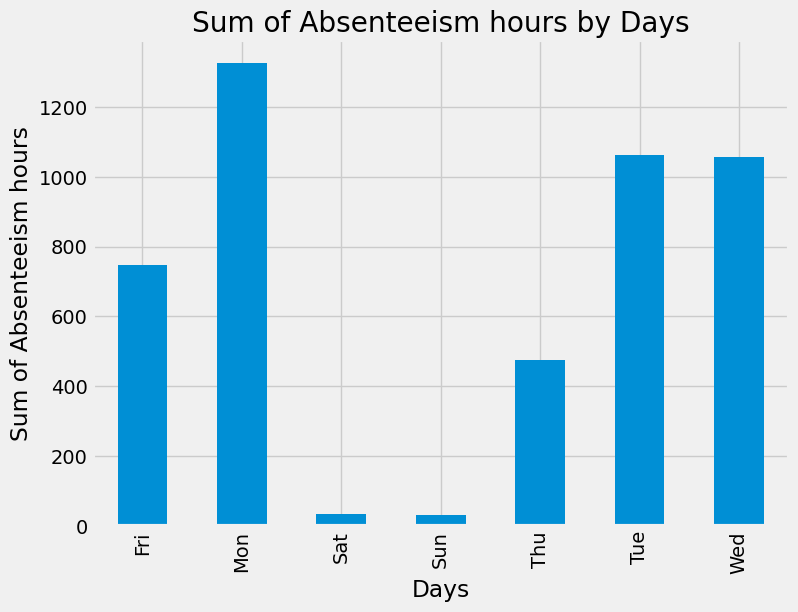

In [31]:
days_abs = df.groupby('Day Name')[['Absenteeism Time in Hours']].sum()
axe = days_abs.plot(kind="bar", figsize=(8,6), legend=False)
axe.set_xlabel('Days')
axe.set_ylabel('Sum of Absenteeism hours')
axe.set_title('Sum of Absenteeism hours by Days')
plt.show()

### From the bar graph above, it is clear that employee are absent mostly on Monday

## Average Transportation Expense by Distance to Work

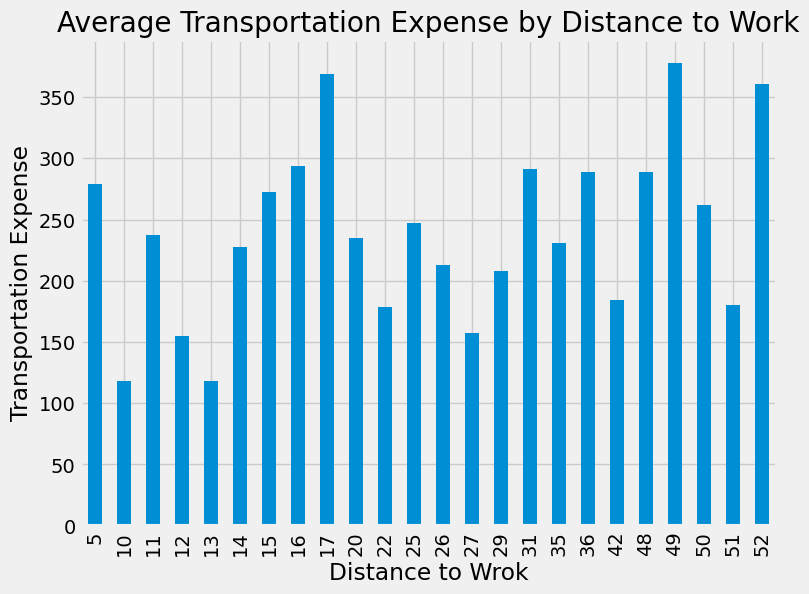

In [32]:
transportation_distance = df.groupby('Distance to Work')[['Transportation Expense']].mean()
axe = transportation_distance.plot(kind='bar', figsize=(8,6), legend=False)
axe.set_xlabel('Distance to Wrok')
axe.set_ylabel('Transportation Expense')
axe.set_title('Average Transportation Expense by Distance to Work')
plt.show()

#### Generally when the distance increases, transportation should increase but the graph above shows the data is fluctuating and we dont know how they travelled and by which transportation mode. So this data is not much helping us. 

## Agewise Count of Employees

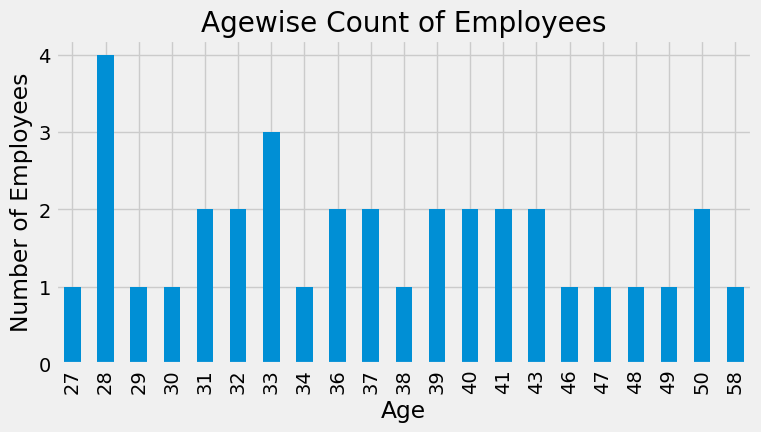

In [33]:
age_employee_count = df.groupby('Age').agg({'ID': pd.Series.nunique})
axe = age_employee_count.plot(kind='bar', figsize=(8,4), legend=False)
axe.set_xlabel('Age')
axe.set_ylabel('Number of Employees')
axe.set_title('Agewise Count of Employees')
plt.show()

#### Based on the bar chart there is a variation in the count of employees across different age groups, indicating a diverse workforce in terms of age

## Average absenteeism hours by Age

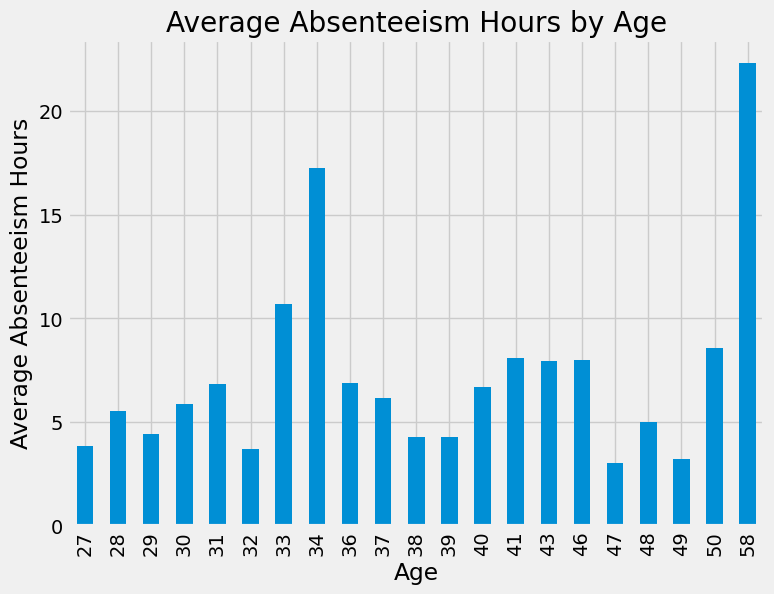

In [34]:
age_abs = df.groupby('Age')[['Absenteeism Time in Hours']].mean()
axe = age_abs.plot(kind='bar', figsize=(8,6), legend=False)
axe.set_xlabel('Age')
axe.set_ylabel('Average Absenteeism Hours')
axe.set_title('Average Absenteeism Hours by Age')
plt.show()

## Daily workload average by Age

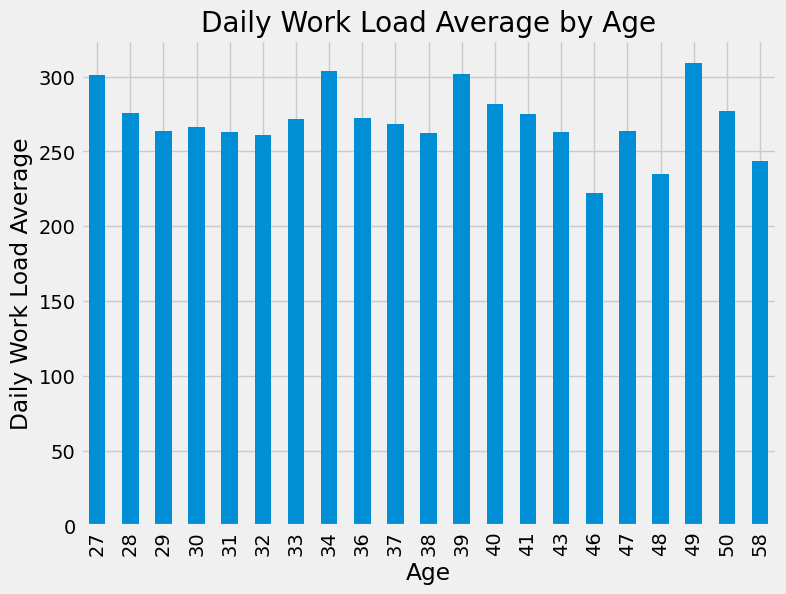

In [35]:
daily_workload_avg = df.groupby('Age')[['Daily Work Load Average']].mean()
axe = daily_workload_avg.plot(kind="bar", figsize=(8,6), legend=False)
axe.set_xlabel('Age')
axe.set_ylabel('Daily Work Load Average')
axe.set_title('Daily Work Load Average by Age')
plt.show()

#### The workload seems to be the same irrespective of the age

## Average Absenteeism Hours by Distance to Work

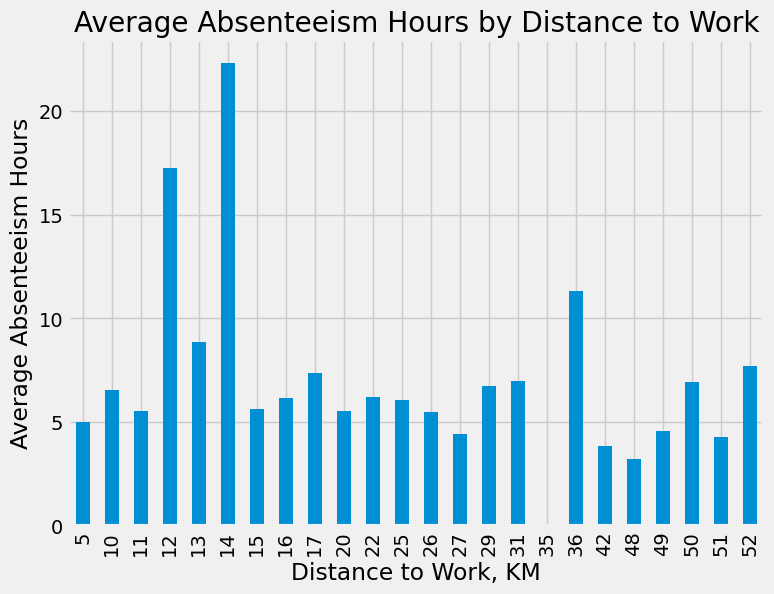

In [36]:
dist_abs = df.groupby('Distance to Work')[['Absenteeism Time in Hours']].mean()
axe = dist_abs.plot(kind='bar', figsize=(8,6), legend=False)
axe.set_xlabel('Distance to Work, KM')
axe.set_ylabel('Average Absenteeism Hours')
axe.set_title('Average Absenteeism Hours by Distance to Work')
plt.show()

#### there isn't a clear linear correlation between absenteeism and distance. other factors like transportation modes, commute times, or the presence of remote work policies alongside distance might provide a more comprehensive understanding of absenteeism dynamics.

## Educationwise count of Employees

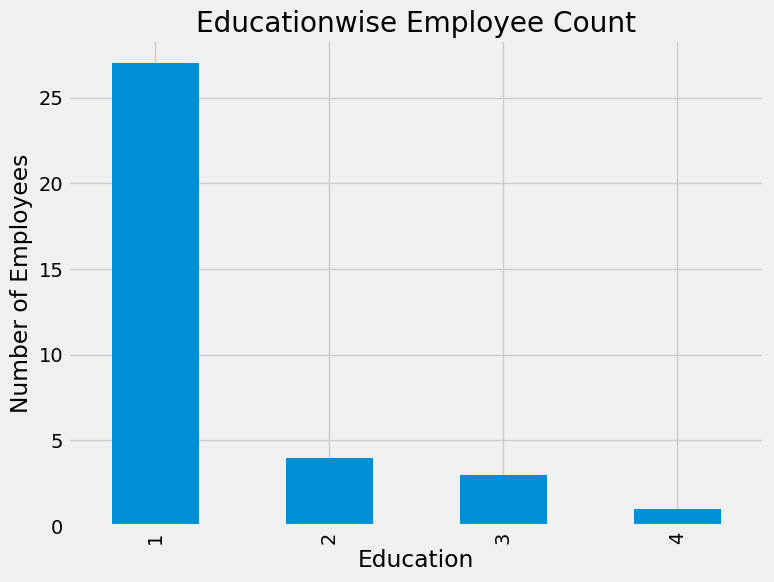

In [37]:
edu_employee_count = df.groupby('Education').agg({'ID': pd.Series.nunique})
axe = edu_employee_count.plot(kind='bar', figsize=(8,6), legend=False)
axe.set_xlabel('Education')
axe.set_ylabel('Number of Employees')
axe.set_title('Educationwise Employee Count')
plt.show()

#### Education is categorized as
1: 'High School',
2: 'Graduate',
3: 'Post Graduate',
4: 'Master & Doctor'
    
Based on the bar graph, employees with the high school degree is the highest.

## Children and Pets by Age

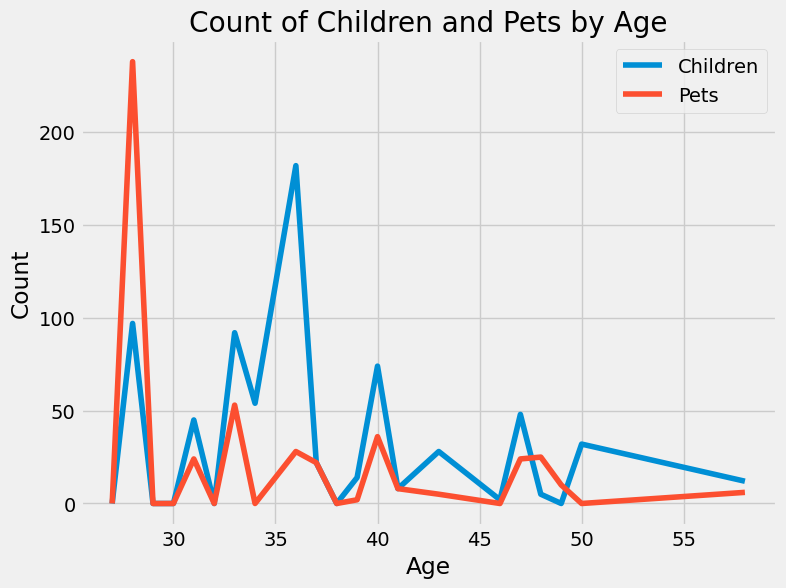

In [38]:
children_pets_age = df.groupby('Age')[['Children', 'Pets']].sum()
axe = children_pets_age.plot(figsize=(8,6))
axe.set_ylabel('Count')
axe.set_title('Count of Children and Pets by Age')
plt.show()

#### It is interesting to see that employees who have son mostly have pets also.

# Feature Engineering

## One Hot Encoding

One-hot encoding is a technique used in data processing and feature engineering, primarily in machine learning and data analysis tasks. It's a method to represent categorical variables as binary vectors, which helps in handling categorical data in a numerical format. In simpler terms, one-hot encoding converts categorical variables into a format that can be provided to machine learning algorithms to improve model performance. It creates binary columns for each category in the categorical variable, where each column corresponds to a unique category and is represented as 0 or 1. The column associated with the category for a particular observation is set to 1 (indicating presence), and all other columns for other categories are set to 0 (indicating absence).

### Examining the Reason for Absence column

In [39]:
reason_columns = pd.get_dummies(df['Reason for Absence'], dtype=int)
reason_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


We will drop the reason zero dummy variable in Python. We are going to do this because we want to avoid potential multicore linearity issues in our analysis. Two variables are considered perfectly collinear if their correlation coefficient is +/- 1.0. Multicollinearity among independent variables will result in less reliable statistical inferences.

In [40]:
reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first=True, dtype=int)
reason_columns.head()

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


if we add all these dummy variables in data frame we end up adding nearly 40 columns. So in situation where we have 700 columns and similar dummy variables, we should always consider the possibility of grouping these variables. The grouping is also classification. Here on the basis of similar characteristics, we will group the reasons. Reason 1-14 releated to various diseases, reasons 15-17 related to pregranancy, reasons 18-21 as they are all about poisoning or signs not elsewhere categorized.

In [41]:
reason_type_1 = reason_columns.loc[:, 1:14].max(axis=1)
reason_type_2 = reason_columns.loc[:, 15:17].max(axis=1)
reason_type_3 = reason_columns.loc[:, 18:21].max(axis=1)
reason_type_4 = reason_columns.loc[:, 22:].max(axis=1)  ## from 22 to end of data frame

#### Concatenate the reasons to the data frame

In [42]:
df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis =1)
df.head()

,ID,Month Value,Day of the Week,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,reason_text,Month Name,Day Name,0,1,2,3
0,11,7,1,26,289,36,33,239.554,30,1,2,1,4,Unjustified absence,Jul,Tue,0,0,0,1
1,36,7,1,0,118,13,50,239.554,31,1,1,0,0,Unknown,Jul,Tue,0,0,0,0
2,3,7,2,23,179,51,38,239.554,31,1,0,0,2,Medical consultation,Jul,Wed,0,0,0,1
3,7,7,3,7,279,5,39,239.554,24,1,2,0,4,Diseases of the eye and adnexa,Jul,Thu,1,0,0,0
4,11,7,3,23,289,36,33,239.554,30,1,2,1,2,Medical consultation,Jul,Thu,0,0,0,1


#### Renaming the column names  and rearranging the column names

In [43]:
df.columns.values

array(['ID', 'Month Value', 'Day of the Week', 'Reason for Absence',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'reason_text',
       'Month Name', 'Day Name', 0, 1, 2, 3], dtype=object)

In [44]:
column_names  = ['ID', 'Month Value', 'Day of the Week', 'Reason for Absence',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'reason_text',
       'Month Name', 'Day Name', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']


In [45]:
df.columns = column_names
df

,ID,Month Value,Day of the Week,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,reason_text,Month Name,Day Name,Reason_1,Reason_2,Reason_3,Reason_4
0,11,7,1,26,289,36,33,239.554,30,1,2,1,4,Unjustified absence,Jul,Tue,0,0,0,1
1,36,7,1,0,118,13,50,239.554,31,1,1,0,0,Unknown,Jul,Tue,0,0,0,0
2,3,7,2,23,179,51,38,239.554,31,1,0,0,2,Medical consultation,Jul,Wed,0,0,0,1
3,7,7,3,7,279,5,39,239.554,24,1,2,0,4,Diseases of the eye and adnexa,Jul,Thu,1,0,0,0
4,11,7,3,23,289,36,33,239.554,30,1,2,1,2,Medical consultation,Jul,Thu,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,5,2,10,179,22,40,237.656,22,2,2,0,8,Diseases of the respiratory system,May,Wed,1,0,0,0
696,28,5,2,6,225,26,28,237.656,24,1,1,2,3,Diseases of the nervous system,May,Wed,1,0,0,0
697,18,5,3,10,330,16,28,237.656,25,2,0,0,8,Diseases of the respiratory system,May,Thu,1,0,0,0
698,25,5,3,23,235,16,32,237.656,25,3,0,0,2,Medical consultation,May,Thu,0,0,0,1


In [46]:
column_name_reordered = ['ID', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value', 'Day of the Week',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason for Absence', 'reason_text',
       'Month Name', 'Day Name']

In [47]:
df = df[column_name_reordered]

In [48]:
df.head()

,ID,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason for Absence,reason_text,Month Name,Day Name
0,11,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4,26,Unjustified absence,Jul,Tue
1,36,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0,0,Unknown,Jul,Tue
2,3,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2,23,Medical consultation,Jul,Wed
3,7,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4,7,Diseases of the eye and adnexa,Jul,Thu
4,11,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2,23,Medical consultation,Jul,Thu


### Examining the Education Column

In [49]:
df['Education'].value_counts()

Education
1    583
3     73
2     40
4      4
Name: count, dtype: int64

Education column contains only the values 1 3 2 and 4.
1: higher degree
2: graduate
3: postgraduate
4: master or a doctor

We can see that with value_counts() method, nearly 600 people of high school education only while just above one hundred have a better degree than that. Therefore separating between graduate postgraduate and doctor degrees becomes less relevant for this study and it would make sense to combine these in a single category. Technically this should be done by overriding the content of the education column after typing dot map and opening parentheses. We must insert a dictionary whose key value pairs will be composed of the existing numbers that will act as keys and the new numbers which will stand for the values for instance up to this point. 

In [50]:
df['Education'] = df['Education'].map({1:0, 2:1, 3:1, 4:1})
df['Education'].unique()

array([0, 1])

In [51]:
df['Education'].value_counts()

Education
0    583
1    117
Name: count, dtype: int64

In [52]:
df.head()

,ID,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason for Absence,reason_text,Month Name,Day Name
0,11,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,26,Unjustified absence,Jul,Tue
1,36,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0,Unknown,Jul,Tue
2,3,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,23,Medical consultation,Jul,Wed
3,7,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,7,Diseases of the eye and adnexa,Jul,Thu
4,11,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,23,Medical consultation,Jul,Thu


## Removing unrelated features

In [53]:
df = df.drop(['ID', 'Reason for Absence', 'reason_text', 'Month Name', 'Day Name'], axis=1)
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


## Final Checkpoint

In [54]:
df_preprocessed = df
df_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


In [55]:
df_preprocessed.shape

(700, 15)

## Creating and classifying the target
Here the target feature is Absenteeism time in hours.

In [56]:
df_preprocessed['Absenteeism Time in Hours'].median()

3.0

In [57]:
targets = np.where(df_preprocessed['Absenteeism Time in Hours'] > df_preprocessed['Absenteeism Time in Hours'].median(), 1, 0)
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

I told you that using the median as a cutoff line is numerically stable and rigid. That's because by using the median we have implicitly balance the dataset roughly half of the targets are zeros while the other half ones as you may remember this will prevent our model from learning to output one of the two classes exclusively thinking it did very well in order to prove that. Let's divide the number of targets that are ones by the total number of targets the number of targets that are ones can be found by summing up all values of targets while the total number of targets is simply the shape on axis 0.

In [58]:
targets.sum()/targets.shape[0]

0.45571428571428574

The result is around 0.46. So around forty six percent of the targets are ones thus around 54 percent of the targets are zeros.So our result will do for this exercise let's proceed noting that our two groups have been distributed roughly equally finally let's drop the absenteeism time and hours from the data frame since we won't be needing it.

In [59]:
## Adding the targets to the data frame
df_preprocessed['Excessive Absenteeism'] = targets

In [60]:
df_preprocessed.shape

(700, 16)

In [61]:
df_preprocessed = df_preprocessed.drop(['Absenteeism Time in Hours'], axis = 1)

In [62]:
df_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,0


In [63]:
df_preprocessed.shape

(700, 15)

## Slicing of Input Variables

In [64]:
unscaled_inputs = df_preprocessed.iloc[:, :-1]
unscaled_inputs.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1


# Feature Scaling or Standardization

In [65]:
from sklearn.preprocessing import StandardScaler
absenteeism_scaler = StandardScaler()

In [66]:
absenteeism_scaler.fit(unscaled_inputs)

StandardScaler()

In [67]:
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)

In [68]:
scaled_inputs

array([[-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
         0.88046927,  0.26848661],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.01928035, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.91902997, -0.58968976],
       ...,
       [ 1.73205081, -0.09298136, -0.31448545, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.01928035,  0.26848661]])

In [69]:
scaled_inputs.shape

(700, 14)

## Splitting the data into training and test set

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
## Test size of 0.2 and setting random_state of 20 solves the problem of data shuffling
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size =0.2, random_state=20)

In [72]:
print(X_train.shape, y_train.shape)

(560, 14) (560,)


In [73]:
print(X_test.shape, y_test.shape)

(140, 14) (140,)


# Creating ML Models

## Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn import  metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

### Model Training

In [75]:
#we must declare a new variable which will be a logistic regression object
reg = LogisticRegression()

#We must fit the regression.
reg.fit(X_train, y_train)

LogisticRegression()

### Logistic Regression Training Model Score

In [76]:
reg.score(X_train, y_train)

0.7839285714285714

## Testing the Model

In [77]:
### Use the trained model to predict the target labels for the test data

In [78]:
reg_predict = reg.predict(X_test)

In [79]:
reg.score(X_test, y_test)

0.7357142857142858

In [80]:
model_accuracy = accuracy_score(y_test, reg_predict)
print('Accuracy Score is: ', model_accuracy)

Accuracy Score is:  0.7357142857142858


In [81]:
model_precision = precision_score(y_test, reg_predict)
print('Precision Score is: ', model_precision)

Precision Score is:  0.7301587301587301


In [82]:
model_recall = recall_score(y_test, reg_predict)
print('Recall Score is: ', model_recall)

Recall Score is:  0.696969696969697


In [83]:
model_f1 = f1_score(y_test, reg_predict)
print('F1 Score is: ', model_f1)

F1 Score is:  0.7131782945736433


In [84]:
print(classification_report(y_test, reg_predict))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        74
           1       0.73      0.70      0.71        66

    accuracy                           0.74       140
   macro avg       0.74      0.73      0.73       140
weighted avg       0.74      0.74      0.74       140



## Random Forest for SK learn

In [85]:
from sklearn.ensemble import RandomForestClassifier

## Model Training

In [86]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)

RandomForestClassifier()

## Random Forest Training Model Score

In [87]:
rforest.score(X_train, y_train)

0.9767857142857143

## Testing the model

In [88]:
rforest_predict = rforest.predict(X_test)

In [89]:
rforest_model = accuracy_score(y_test, rforest_predict)
print('RF model accuracy score is: ', rforest_model)

RF model accuracy score is:  0.75


In [90]:
rforest_precision = precision_score(y_test, rforest_predict)
print('RF model precision score is: ', rforest_precision)

RF model precision score is:  0.746031746031746


In [91]:
rforest_recall = recall_score(y_test, rforest_predict)
print('RF model recall score is: ', rforest_recall)

RF model recall score is:  0.7121212121212122


In [92]:
rforest_f1 = f1_score(y_test, rforest_predict)
print('RF model f1 score is: ', rforest_f1)

RF model f1 score is:  0.7286821705426357


In [93]:
print(classification_report(y_test, rforest_predict))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77        74
           1       0.75      0.71      0.73        66

    accuracy                           0.75       140
   macro avg       0.75      0.75      0.75       140
weighted avg       0.75      0.75      0.75       140



Testing accuracy is always lower than the trained accuracy. If the test accuracy is lower than 10% - 20% then it will be the case of overfitting. In our case we are small percentage difference.